# work in progress - will update, comment, repair later

In [1]:
import time
import os
import pandas as pd
from pandas.io.json import json_normalize
import json
pd.set_option('display.max_columns', None, 'display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df_all = pd.read_csv('./poverty_counties/counties_center_merged.csv')

In [3]:
df_all['properties.center_per_state'] = df_all.groupby(by='properties.state')['properties.centers'].transform('sum')

In [4]:
df = df_all[df_all['properties.center_per_state'] > 9]

In [5]:
df_none = df_all[df_all['properties.center_per_state'] == 0]

In [6]:
df.dropna(subset=['properties.houselhold_income_med'], inplace=True)
df_none.dropna(subset=['properties.houselhold_income_med'], inplace=True)
df_all.dropna(subset=['properties.houselhold_income_med'], inplace=True)

/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df['properties.center_per_state'].value_counts()

15    315
87    254
17    250
24    172
23    159
12    125
10    110
20    102
18     95
28     92
34     88
31     83
40     67
14     39
19     29
16     15
Name: properties.center_per_state, dtype: int64

In [8]:
df.groupby(by = 'properties.state')['properties.houselhold_income_med'].median()

properties.state
 Alabama           38248.0
 Arizona           45383.0
 California        54707.5
 Colorado          49310.0
 Florida           44224.0
 Georgia           38827.0
 Illinois          49025.0
 Indiana           48120.5
 Iowa              49942.0
 Louisiana         40793.0
 Michigan          43373.0
 Minnesota         53059.0
 Missouri          41351.0
 North Carolina    41031.0
 Ohio              48462.0
 Pennsylvania      49028.0
 South Carolina    40312.5
 Tennessee         39728.0
 Texas             46454.5
 Utah              52865.0
 Virginia          49639.0
 Washington        50145.0
 Wisconsin         51411.5
Name: properties.houselhold_income_med, dtype: float64

In [9]:
df['properties.houselhold_income_med'].mean()

47879.91077694236

In [10]:
df_all['properties.houselhold_income_med'].mean()

47973.225970719286

In [11]:
df[df['properties.centers'] > 0]['properties.houselhold_income_med'].mean()

51680.776923076926

In [12]:
df[df['properties.centers'] < 1]['properties.houselhold_income_med'].mean()

47310.328530259365

In [13]:
df[df['properties.centers'] < 1].groupby(by = 'properties.state')['properties.houselhold_income_med'].mean()

properties.state
 Alabama           37721.879310
 Arizona           42854.400000
 California        57786.538462
 Colorado          50809.236364
 Florida           43686.041667
 Georgia           41053.409722
 Illinois          50671.111111
 Indiana           50597.202532
 Iowa              50961.528090
 Louisiana         41469.508772
 Michigan          44595.014493
 Minnesota         54924.000000
 Missouri          42207.327103
 North Carolina    41552.770115
 Ohio              49362.111111
 Pennsylvania      51367.807018
 South Carolina    39305.179487
 Tennessee         40652.151163
 Texas             47964.767544
 Utah              56084.227273
 Virginia          54805.183333
 Washington        48971.620690
 Wisconsin         51329.155172
Name: properties.houselhold_income_med, dtype: float64

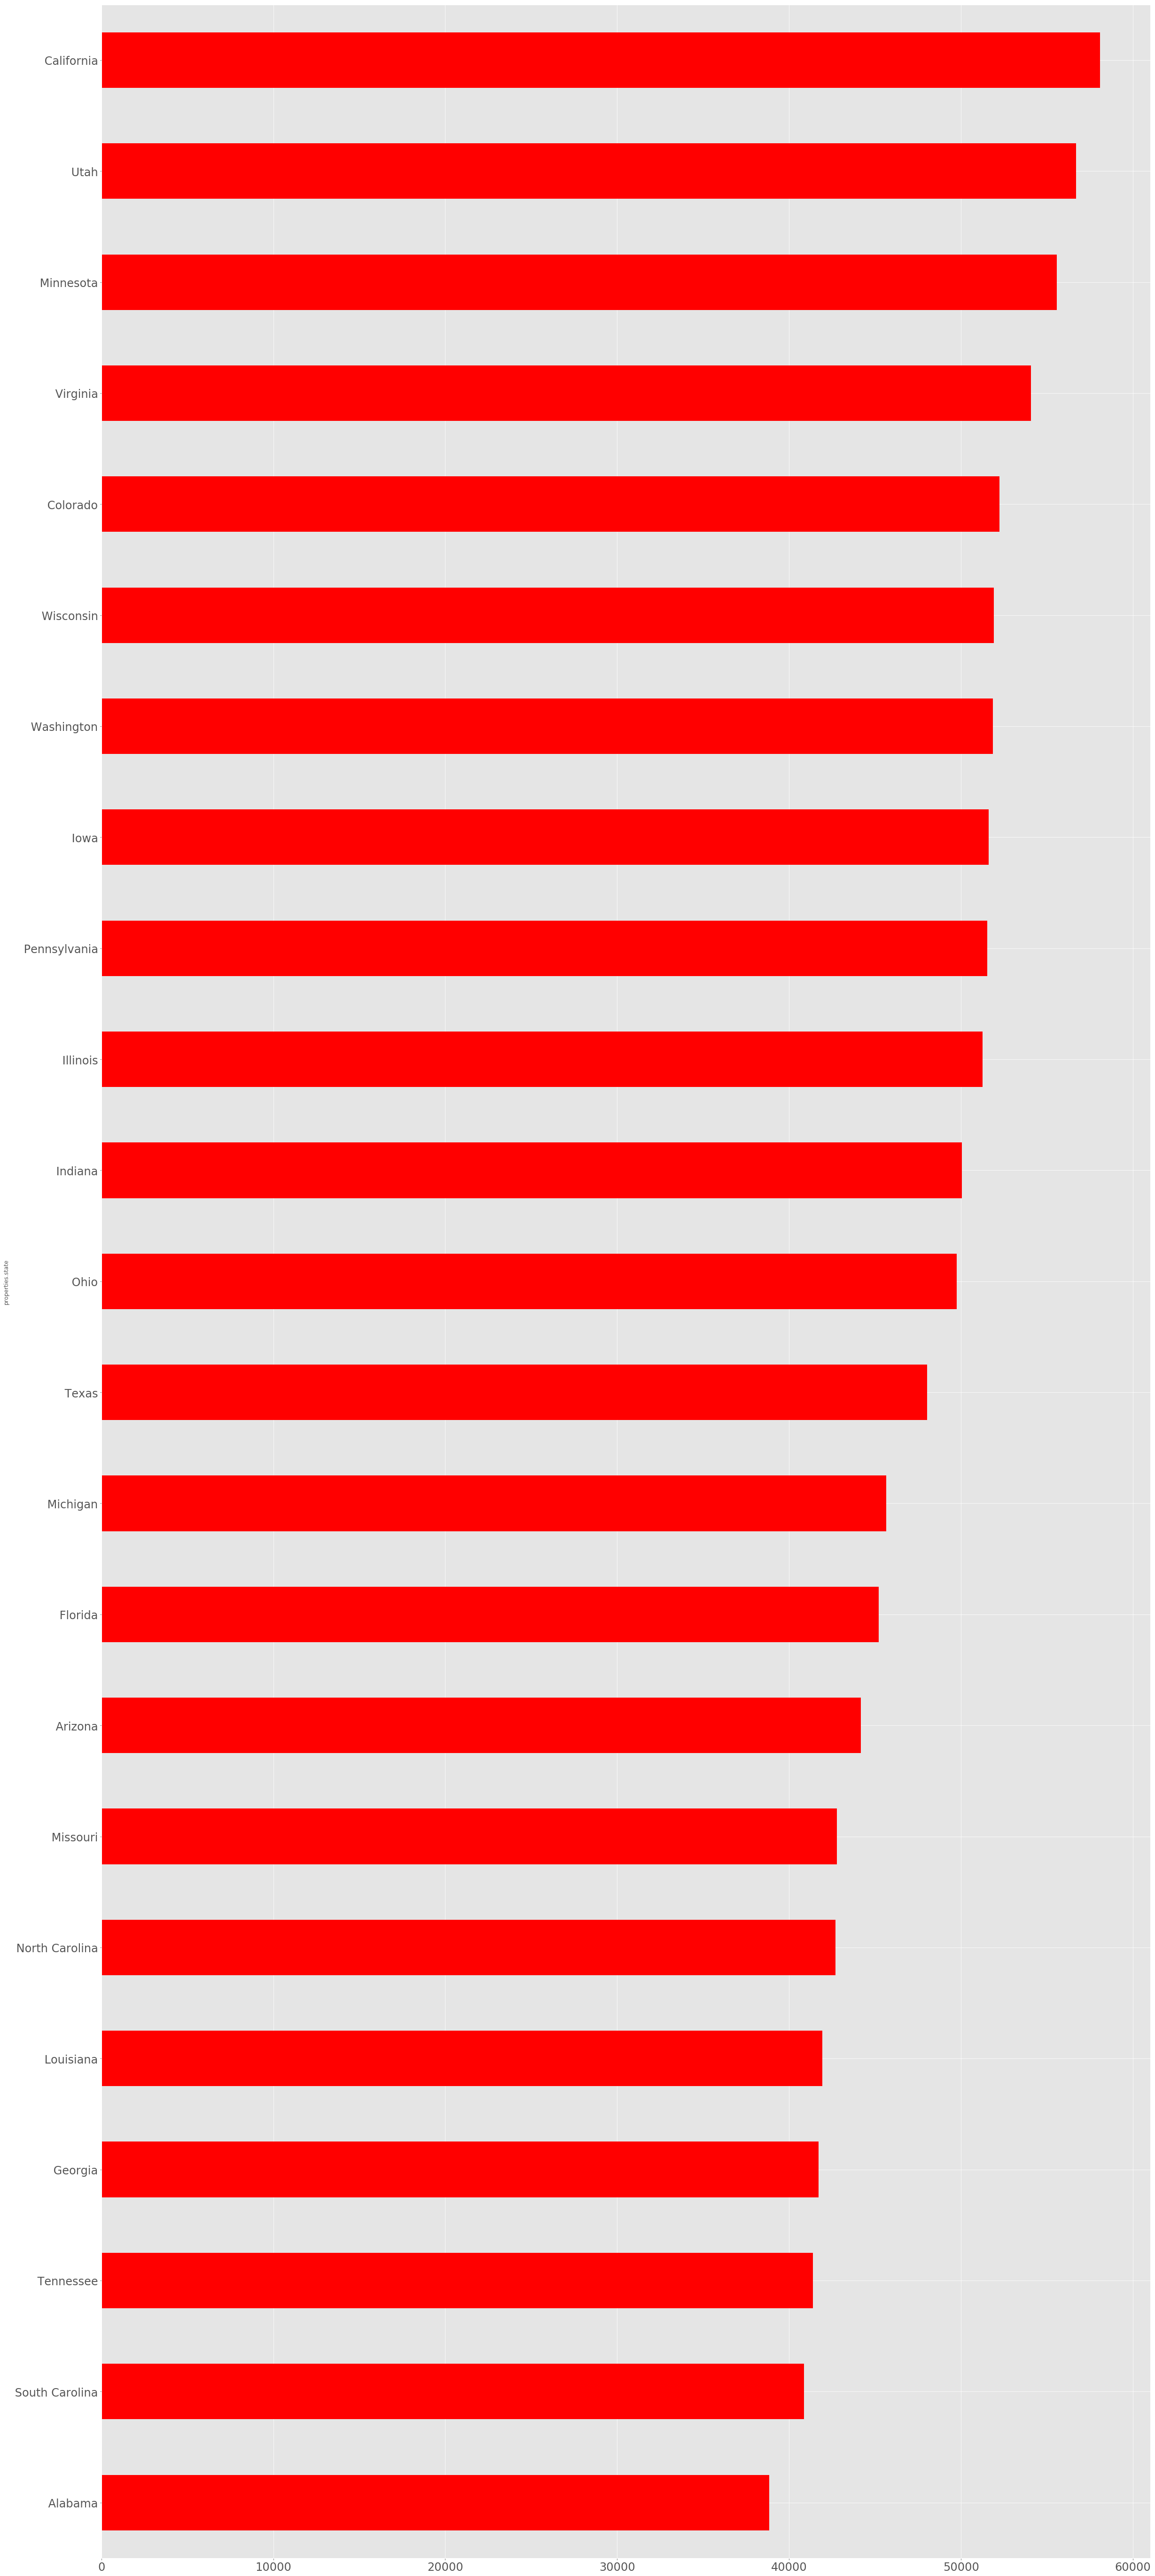

In [14]:
df.groupby(by = 'properties.state')['properties.houselhold_income_med'].mean().sort_values(ascending = True, na_position = 'first').plot(figsize = (40,100), kind = 'barh', fontsize = 24, color="red")

In [15]:
df.keys()

Index(['properties.employment_perc_color',
       'properties.health_insurance_perc_color',
       'properties.poverty_level_perc_color',
       'properties.houselhold_income_med_color', 'geometry.coordinates',
       'geometry.type', 'properties.county_code',
       'properties.county_code_short', 'properties.name_short',
       'properties.name', 'properties.employment_perc',
       'properties.houselhold_income_med', 'properties.health_insurance_perc',
       'properties.poverty_level_perc', 'properties.state',
       'properties.population', 'properties.area', 'properties.area_clipped',
       'properties.centers', 'properties.area_perc',
       'properties.population_perc', 'properties.center_per_state'],
      dtype='object')

In [16]:
print(df_all['properties.houselhold_income_med'].mean())
print(df_none['properties.houselhold_income_med'].mean())
print(df['properties.houselhold_income_med'].mean())

47973.225970719286
64108.47191011236
47879.91077694236


In [17]:
print(df_all['properties.health_insurance_perc'].mean())
print(df_none['properties.health_insurance_perc'].mean())
print(df['properties.health_insurance_perc'].mean())

87.72676639083386
88.23146067415729
87.45228070175438


In [18]:
print(df_all['properties.employment_perc'].mean())
print(df_none['properties.employment_perc'].mean())
print(df['properties.employment_perc'].mean())

58.81868236791852
67.22921348314607
58.36446115288221


In [19]:
print(df_all['properties.poverty_level_perc'].mean())
print(df_none['properties.poverty_level_perc'].mean())
print(df['properties.poverty_level_perc'].mean())

16.406779121578612
11.823595505617977
16.441203007518794


In [20]:
df_all['properties.centers'].sum()

616

In [21]:
df_all.shape

(3142, 22)

In [22]:
print(df_all.sort_values(by=['properties.poverty_level_perc'], ascending=[False]).head(315)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.poverty_level_perc']).head(315)['properties.centers'].sum())

40
24


In [23]:
print(df_all.sort_values(by=['properties.employment_perc'], ascending=[False]).head(315)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.employment_perc']).head(315)['properties.centers'].sum())

160
1


In [24]:
print(df_all.sort_values(by=['properties.health_insurance_perc'], ascending=[False]).head(315)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.health_insurance_perc']).head(315)['properties.centers'].sum())

41
55


In [25]:
print(df_all.sort_values(by=['properties.houselhold_income_med'], ascending=[False]).head(315)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.houselhold_income_med']).head(315)['properties.centers'].sum())

70
9


In [26]:
print(df_all.sort_values(by=['properties.employment_perc'], ascending=[False]).head(1500)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.employment_perc']).head(1500)['properties.centers'].sum())

510
88


In [27]:
print(df_all.sort_values(by=['properties.health_insurance_perc'], ascending=[False]).head(1500)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.health_insurance_perc']).head(1500)['properties.centers'].sum())

271
324


In [28]:
print(df_all.sort_values(by=['properties.houselhold_income_med'], ascending=[False]).head(1500)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.houselhold_income_med']).head(1500)['properties.centers'].sum())

417
169


In [29]:
print(df_all.sort_values(by=['properties.poverty_level_perc'], ascending=[False]).head(1500)['properties.centers'].sum())
print(df_all.sort_values(by=['properties.poverty_level_perc']).head(1500)['properties.centers'].sum())

359
231
